In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importing data**

In [26]:
path = "/content/drive/MyDrive/Colab Notebooks/NUS_FinTech/Project1/NVDA.csv"
df_NVDA = pd.read_csv(path)
df_NVDA

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415963,51048000
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383690,34320000
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382495,24436800
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381300,22752000
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363370,24403200
...,...,...,...,...,...,...,...
5972,2022-10-17,115.180000,119.480003,115.169998,118.879997,118.879997,58077400
5973,2022-10-18,123.440002,124.919998,116.180000,119.669998,119.669998,65936200
5974,2022-10-19,118.790001,123.500000,118.339996,120.510002,120.510002,52313100
5975,2022-10-20,121.129997,127.690002,121.050003,121.940002,121.940002,65239800


**Checking if time-series is stationary using ADF test**

In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_NVDA["Close"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

#since p-value > 0.05, we conclude that the time-series is not stationary

ADF Statistic: -0.9254580922344793
p-value: 0.779473147249061


**Choice of d**

**Finding out what is the order of differencing required to make time series stationary using the pmdarima package**

Alternatively, can plot difference manually and plot acf to deduce what is the appropriate differencing order to choose

From this we deduce that d = 1



In [28]:
#from statsmodels.graphics.tsaplots import plot_acf

#using the pmdarima package to find out appropriate differencing to use
#!pip install pmdarima
from pmdarima.arima.utils import ndiffs

ndiffs(df_NVDA["Close"], test="adf")
#ndiff = 1 

1

**Choice of p**

**Choosing number of lags to be used as predictors in the arima model**

using PACF plot 

from PACF plot, choice of p is 11 since it stands out the most above the significance line

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


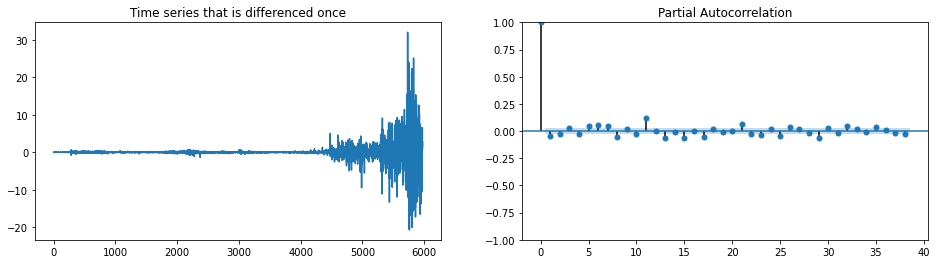

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = df_NVDA["Close"].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Time series that is differenced once")
ax2.set_ylim(0,20)
plot_pacf(diff, ax=ax2);

**Choice of q**

**Choosing number of lagged forecast errors that should go into the ARIMA model**

using ACF plot

from ACF plot, choice of q is 11

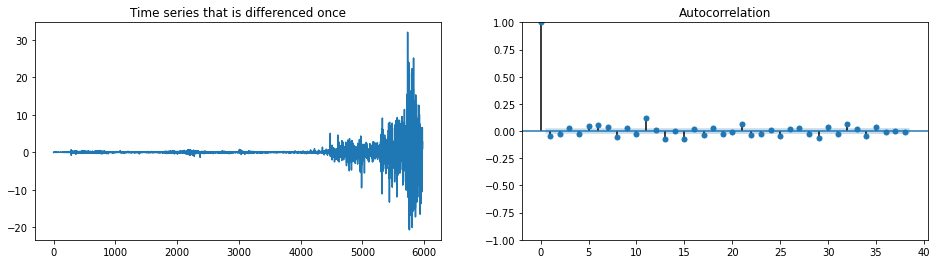

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

diff = df_NVDA["Close"].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Time series that is differenced once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

**Fitting the ARIMA model**

In [31]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_NVDA["Close"], order=(11, 2, 11))
result = model.fit(method_kwargs={"warn_convergence": False})

In [33]:
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5977
Model:               ARIMA(11, 2, 11)   Log Likelihood              -12761.593
Date:                Sun, 23 Oct 2022   AIC                          25569.187
Time:                        15:39:00   BIC                          25723.179
Sample:                             0   HQIC                         25622.675
                               - 5977                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2461      0.041    -30.175      0.000      -1.327      -1.165
ar.L2         -1.7057      0.043    -39.889      0.000      -1.790      -1.622
ar.L3         -1.7258      0.052    -33.461      0.0

In [34]:
predicted = result.predict()
    #start=1,
    #end=5977,
    #dynamic=False

actual = df_NVDA["Close"]


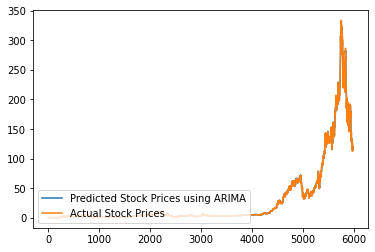

In [37]:
plt.plot(predicted, label="Predicted Stock Prices using ARIMA")
plt.plot(actual, label = "Actual Stock Prices")

plt.legend(loc="lower left")

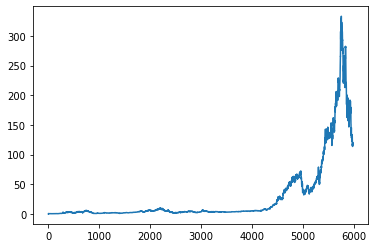

In [38]:
result.predict().plot()

***Using the ARIMA model to forecast for the next two weeks ***

In [39]:
forecast = result.forecast(10)
forecast 

5977    123.576739
5978    123.894916
5979    126.187965
5980    125.746948
5981    126.691450
5982    125.545478
5983    124.801249
5984    126.055077
5985    125.194736
5986    125.289532
Name: predicted_mean, dtype: float64

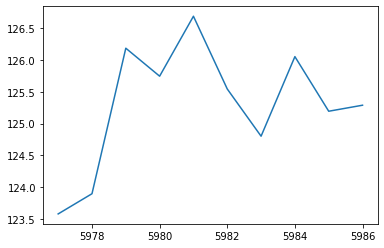

In [40]:
plt.plot(forecast)

**Export predictions for the next 10 trading days**

In [41]:
forecast.to_csv("BrandonNeoBingJie_Impl_2.csv")